## 第2章 TensorFlow张量及其计算

## 2.3 张量
张量（Tensor）是具有统一类型（通常是整型或者浮点类型）的多维数组，它和NumPy里面的ndarray非常相似。TensorFlow的张量（tf.Tensor）的基本属性与ndarray类似，具有数据类型和形状维度等，同时TensorFlow提供了丰富的操作库（tf.add，tf.matmul，tf.linalg.inv等），它们使用和生成tf.Tensor。 tf.Tensor与NumPy还可以互相转换。除这些相似点之外，tf.Tensor与NumPy也有很多不同之处，最大的不同就是NumPy只能在CPU上计算,没有实现GPU加速计算，而tf.Tensor不但可以在CPU上计算，也可以在GPU加速计算。接下来，我们就张量的基本属性、基本操作进行简单说明，同时总结了tf.Tensor与NumPy的异同点。
### 2.3.1 张量的基本属性
张量有几个重要的属性。
- 形状(shape)：张量的每个维度的长度，与NumPy数组的shape一样。
- 维度/轴（axis）：可以理解为数组的维度，例如，二维数组或者三维数组等。
- 秩(rank): 张量的维度数量，可用ndim查看。
- 大小（size)： 张量的总的项数，也就是所有元素的数量，与NumPy数组的size一样。
- 数据类型(dtype): 张量元素的数据类型，如果在创建张量时不指定，TensorFlow会自动选择合适的数据类型。
 接下来通过一些实例进行说明。用tf.constant生成各种维度的张量：

In [1]:
import tensorflow as tf
import numpy as np

# 这个张量没有轴（不是数组），被称作0秩张量，也被称为标量
rank_0_tensor = tf.constant(5) 
print(rank_0_tensor)
# tf.Tensor(5, shape=(), dtype=int32)

# 这个张量有一个轴，被称作1秩张量，也被称为向量。
rank_1_tensor = tf.constant([5, 4 ,3, 2, 1]) 
print(rank_1_tensor)
# tf.Tensor([5 4 3 2 1], shape=(5,), dtype=int32)

# 这个张量有两个轴，被称作2秩张量，也被称为矩阵。
rank_2_tensor = tf.constant([[5, 4 ,3, 2, 1],
                             [1, 2, 3, 4, 5]]) 
print(rank_2_tensor)

# tf.Tensor([[5 4 3 2 1] [1 2 3 4 5]], shape=(2, 5), dtype=int32)

tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor([5 4 3 2 1], shape=(5,), dtype=int32)
tf.Tensor(
[[5 4 3 2 1]
 [1 2 3 4 5]], shape=(2, 5), dtype=int32)


我们看一个4维的张量及相关属性。

In [2]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])
print(rank_4_tensor)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]], shape=(3, 2, 4, 5), dtype=float32)


这是一个秩为4，形状为（3,2,4,5）的张量，各轴的大小与张量形状之间的对应关系，可参考图2-6。  
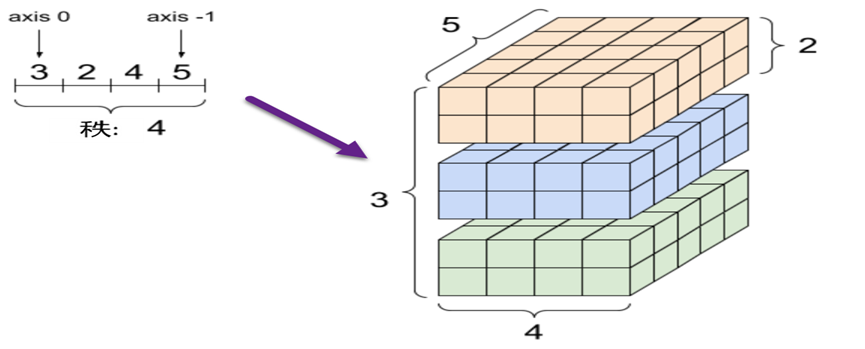
 <center>图2-6 张量各轴大小与张量形状之间对应关系</center>
	轴一般按照从全局到局部的顺序进行排序：首先是批次轴，随后是空间维度，最后是每个位置的特征。这样，在内存中，特征向量就会位于连续的区域。


### 2.3.2 张量切片
	张量切片与NumPy切片一样，也是基于索引。切片或者索引是Python语言中针对字符串、元祖或者列表进行读写的魔法方法，在第1章介绍NumPy的时候也提到过，针对NumPy数组，我们也可以进行索引或者切片操作。同样的，我们也可以对TensorFlow里面的张量进行索引或者切片操作，并且遵循Python语言或者说NumPy数组的索引规则。
- 索引从下标0开始。
- 负索引按照倒叙进行索引，比如 -1表示倒数第一个元素。
- 切片的规则是start:stop:step。
- 通过制定多个索引，可以对多维度张量进行索引或者切片。
示例如下：

In [3]:
# 生成一维张量
tf_tensor = tf.constant([1,2,3,4,5,6,7,8,9,10])

#对1秩张量进行索引和切片
# 取张量的第二个元素
print(tf_tensor[1].numpy()) 
# 2

# 取张量中的第二个元素以及之后的元素，输出结果为一个数组
print(tf_tensor[1:].numpy()) 
# [ 2  3  4  5  6  7  8  9 10]

# 取张量中的第二个元素以及之后的元素，并且没两个元素取一个，输出结果为一个数组
print(tf_tensor[1::2].numpy()) 
# [ 2  4  6  8 10]


#生成二维张量
tf_tensor = tf.constant([[1,2,3,4,5],[6,7,8,9,10]])

# 对2秩张量进行索引和切片
# 取张量的第二行
print(tf_tensor[1].numpy()) 
# [ 6  7  8  9 10]

# 取张量的第二行
print(tf_tensor[1,:].numpy()) 
# [ 6  7  8  9 10]


# 去第二行的元素，注意，这里不改变张量的维度
print(tf_tensor[1:,1:].numpy()) 
# [[ 7  8  9 10]]

2
[ 2  3  4  5  6  7  8  9 10]
[ 2  4  6  8 10]
[ 6  7  8  9 10]
[ 6  7  8  9 10]
[[ 7  8  9 10]]


### 2.3.3 操作形状
  与NumPy中的reshape、transpose函数一样，TensorFlow也提供reshape、transpose函数帮助我们操作张量形状。
	通过重构可以改变张量的形状。重构的速度很快，资源消耗很低，因为不需要复制底层数据，只是形成一个新的视图，原张量并没有改变。

In [4]:
#生成一个3维张量
rank_3_tensor = tf.constant([[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],[15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],[25, 26, 27, 28, 29]]])

数据在内存中的布局保持不变，同时使用请求的形状创建一个指向同一数据的新张量。TensorFlow 采用 C 样式的“行优先”内存访问顺序，即最右侧的索引值递增对应于内存中的单步位移。

In [5]:
#把3维张量平铺为向量
print(tf.reshape(rank_3_tensor, -1))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


一般来说，tf.reshape 唯一合理的用途是用于合并或拆分相邻轴（或添加/移除 1）。
对于3x2x5 张量，重构为(3x2)x5或3x(2x5) 都合理，因为切片不会混淆

In [6]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


重构可以处理总元素个数相同的任何新形状，但是如果不遵从轴的顺序，则不会发挥任何作用。
利用 tf.reshape 无法实现轴的交换，要交换轴，您需要使用 tf.transpose

<font size=4  color=blue >拓展部分 </font>   
到目前为止，我们看到的都是形状规则的张量，如果张量的某个轴上的元素个数可变，则称为“不规则”张量。对于不规则数据，我们使用tf.ragged.Tensor来创建：

In [7]:
import tensorflow as tf

tensor = tf.ragged.constant([
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]])

print(tensor)
# <tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>

print(tensor.shape)
#(4, None)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>
(4, None)
